# Task 2
### In this we have to perform proper EDA, Feature Engineering, Univariate and Bivariate Analysis and also write our analysis and observations in a word document.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('TASK.csv')
df.head()

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,01/02/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,01/03/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,01/05/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,01/05/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,01/05/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"


In [3]:
df.tail()

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
9559,765,08/30/2008,NaN,Nepal,"Barbhanjyang VDC-8, Tanahun District",landslide,Landslide,Downpour,NaN,2.0,...,107157.0,NP,AS,sJVPilQc7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,28.010319,84.377406,"(28.010318739999999, 84.377406140000005)"
9560,9682,08/30/2008,NaN,Nepal,"Chokchissapani VDC-9, Tanahun District",landslide,Landslide,Downpour,NaN,3.0,...,107157.0,NP,AS,sJVPilQc7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,28.100258,84.421435,"(28.100258220000001, 84.421435259999996)"
9561,9683,07/03/2011,NaN,Nepal,Diktel-Bhojpur road in Khotang,landslide,Landslide,Continuous_rain,NaN,0.0,...,3250.0,NP,AS,sGq1pkQBW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,27.218190,86.919138,"(27.218190150000002, 86.919138230000001)"
9562,9684,07/03/2011,NaN,Nepal,Jayaram-Diktel road in Khotang,landslide,Landslide,Continuous_rain,NaN,NaN,...,3250.0,NP,AS,sGq1pkQBW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,27.205173,86.656833,"(27.205173460000001, 86.656833419999998)"
9563,9685,07/03/2011,NaN,Nepal,Hurlung Jalapa in Khotang,landslide,Landslide,Continuous_rain,NaN,NaN,...,3250.0,NP,AS,sGq1pkQBW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,27.306692,86.774975,"(27.30669194, 86.774975130000001)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9564 non-null   int64  
 1   date                  9563 non-null   object 
 2   time                  4024 non-null   object 
 3   country               6167 non-null   object 
 4   nearest_places        9472 non-null   object 
 5   hazard_type           9555 non-null   object 
 6   landslide_type        9546 non-null   object 
 7   trigger               8808 non-null   object 
 8   storm_name            550 non-null    object 
 9   fatalities            8212 non-null   float64
 10  injuries              3942 non-null   float64
 11  source_name           5545 non-null   object 
 12  source_link           8233 non-null   object 
 13  location_description  4109 non-null   object 
 14  location_accuracy     9562 non-null   object 
 15  landslide_size       

In [5]:
df.describe()

,id,fatalities,injuries,cat_id,distance,population,version,changeset_id,latitude,longitude
count,9564.000000,8212.000000,3942.000000,9530.000000,9530.000000,9.530000e+03,9555.000000,9.555000e+03,9564.000000,9564.000000
mean,4824.008260,3.537141,0.852359,4806.020042,11.902521,1.568749e+05,1.121193,8.807481e+08,25.661806,3.815776
std,2799.040122,64.669763,8.280788,2792.516669,15.618193,8.272427e+05,0.326369,1.325119e+09,20.416185,100.238678
min,1.000000,0.000000,0.000000,1.000000,0.000030,0.000000e+00,1.000000,1.000000e+00,-46.774800,-170.799800
25%,2401.750000,0.000000,0.000000,2390.250000,2.367748,1.940000e+03,1.000000,1.000000e+00,13.579075,-104.920000
50%,4805.500000,0.000000,0.000000,4782.500000,6.264345,7.317000e+03,1.000000,1.000000e+00,29.855400,23.184050
75%,7253.250000,1.000000,0.000000,7222.750000,15.836362,3.374800e+04,1.000000,1.642595e+09,41.134575,94.359700
max,9685.000000,5000.000000,374.000000,9669.000000,215.448880,1.269184e+07,2.000000,4.294356e+09,72.627500,179.422100


In [6]:
null = df.isnull().sum()
null

id                         0
date                       1
time                    5540
country                 3397
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
storm_name              9014
fatalities              1352
injuries                5622
source_name             4019
source_link             1331
location_description    5455
location_accuracy          2
landslide_size           790
photos_link             8575
cat_src                   36
cat_id                    34
countryname               42
near                      35
distance                  34
adminname1               117
adminname2              3022
population                34
countrycode               44
continentcode           3810
key                       28
version                    9
tstamp                     9
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
dtype: int64

In [7]:
df.shape

(9564, 34)

In [8]:
null_per = null*100/len(df)
null_per

id                       0.000000
date                     0.010456
time                    57.925554
country                 35.518611
nearest_places           0.961941
hazard_type              0.094103
landslide_type           0.188206
trigger                  7.904642
storm_name              94.249268
fatalities              14.136345
injuries                58.782936
source_name             42.022166
source_link             13.916771
location_description    57.036805
location_accuracy        0.020912
landslide_size           8.260142
photos_link             89.659138
cat_src                  0.376412
cat_id                   0.355500
countryname              0.439147
near                     0.365956
distance                 0.355500
adminname1               1.223338
adminname2              31.597658
population               0.355500
countrycode              0.460059
continentcode           39.836888
key                      0.292765
version                  0.094103
tstamp        

### As seen above there are many null values in different columns

In [9]:
df.duplicated().sum()

0

In [10]:
df.countryname.value_counts().head(30)

countryname
United States          3021
India                  1273
Philippines             676
Nepal                   483
China                   426
Indonesia               356
United Kingdom          231
Brazil                  214
Canada                  174
Malaysia                172
Pakistan                142
Vietnam                 116
New Zealand             106
Australia               105
Colombia                101
Mexico                   88
Guatemala                82
Japan                    82
Thailand                 77
Costa Rica               76
Sri Lanka                75
Taiwan                   68
Trinidad and Tobago      65
Peru                     59
Bangladesh               58
Italy                    55
Kenya                    54
Uganda                   45
Myanmar [Burma]          44
Panama                   44
Name: count, dtype: int64

In [11]:
df.countrycode.value_counts().head(30)

countrycode
US    3021
IN    1273
PH     676
NP     483
CN     426
ID     356
GB     231
BR     214
CA     174
MY     172
PK     142
VN     116
NZ     106
AU     105
CO     101
MX      88
GT      82
JP      82
TH      77
CR      76
LK      75
TW      68
TT      65
PE      59
BD      58
IT      55
KE      54
UG      45
MM      44
PA      44
Name: count, dtype: int64

### Hence the country name and country code have same values we decided to drop country code column

In [12]:
df.columns

Index(['id', 'date', 'time', 'country', 'nearest_places', 'hazard_type',
       'landslide_type', 'trigger', 'storm_name', 'fatalities', 'injuries',
       'source_name', 'source_link', 'location_description',
       'location_accuracy', 'landslide_size', 'photos_link', 'cat_src',
       'cat_id', 'countryname', 'near', 'distance', 'adminname1', 'adminname2',
       'population', 'countrycode', 'continentcode', 'key', 'version',
       'tstamp', 'changeset_id', 'latitude', 'longitude', 'geolocation'],
      dtype='object')

In [13]:
df.drop(columns=['continentcode', 'countrycode', 'source_link', 'source_name', 'storm_name','photos_link','key','version','geolocation','time','changeset_id','cat_id','cat_src','adminname1','adminname2','tstamp','location_accuracy','location_description','near'],inplace=True)

### Here we have dropped these columns as they does not add value to the analysis

In [14]:
df.columns

Index(['id', 'date', 'country', 'nearest_places', 'hazard_type',
       'landslide_type', 'trigger', 'fatalities', 'injuries', 'landslide_size',
       'countryname', 'distance', 'population', 'latitude', 'longitude'],
      dtype='object')

In [15]:
df['landslide_type'].value_counts()

landslide_type
Landslide              6673
Mudslide               1830
Rockfall                486
Complex                 232
Debris_Flow             173
Other                    66
Riverbank_Collapse       28
Unknown                  18
Lahar                     7
Snow_Avalanche            7
mudslide                  7
Translational_Slide       6
Creep                     5
landslide                 4
Earthflow                 3
Rockslide                 1
Name: count, dtype: int64

In [16]:
df['trigger'].value_counts()

trigger
Downpour                   4454
Rain                       1920
Unknown                     752
Tropical_Cyclone            543
Continuous_rain             518
Monsoon                     122
Earthquake                   76
Snowfall_snowmelt            75
Mining_digging               74
unknown                      61
Construction                 52
Flooding                     49
Continuous_Rain              39
Freeze_thaw                  26
No_Apparent_trigger          18
Other                        15
Dam_Embankment_Collapse       9
No_Apparent_Trigger           2
monsoon                       2
Volcano                       1
Name: count, dtype: int64

In [17]:
df.head()

,id,date,country,nearest_places,hazard_type,landslide_type,trigger,fatalities,injuries,landslide_size,countryname,distance,population,latitude,longitude
0,1,01/02/2007,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,1.0,NaN,Medium,United Kingdom,0.22405,24803.0,54.549400,-3.587500
1,2,01/03/2007,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,Medium,Peru,12.26171,0.0,-10.383800,-75.426700
2,3,01/05/2007,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,7.0,NaN,Large,Brazil,0.63016,153361.0,-22.282346,-42.536362
3,4,01/05/2007,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,2.0,NaN,Medium,Brazil,14.05144,11555.0,-22.045200,-42.673400
4,5,01/05/2007,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,1.0,NaN,Medium,Brazil,10.07582,54415.0,-23.231100,-46.613600


In [18]:
Top_20_countries_landslides= df['countryname'].value_counts().sort_values(ascending=False).head(20)
dict = Top_20_countries_landslides.to_dict()

### Here we have taken the top 20 countries according to the no. of landslides occurred

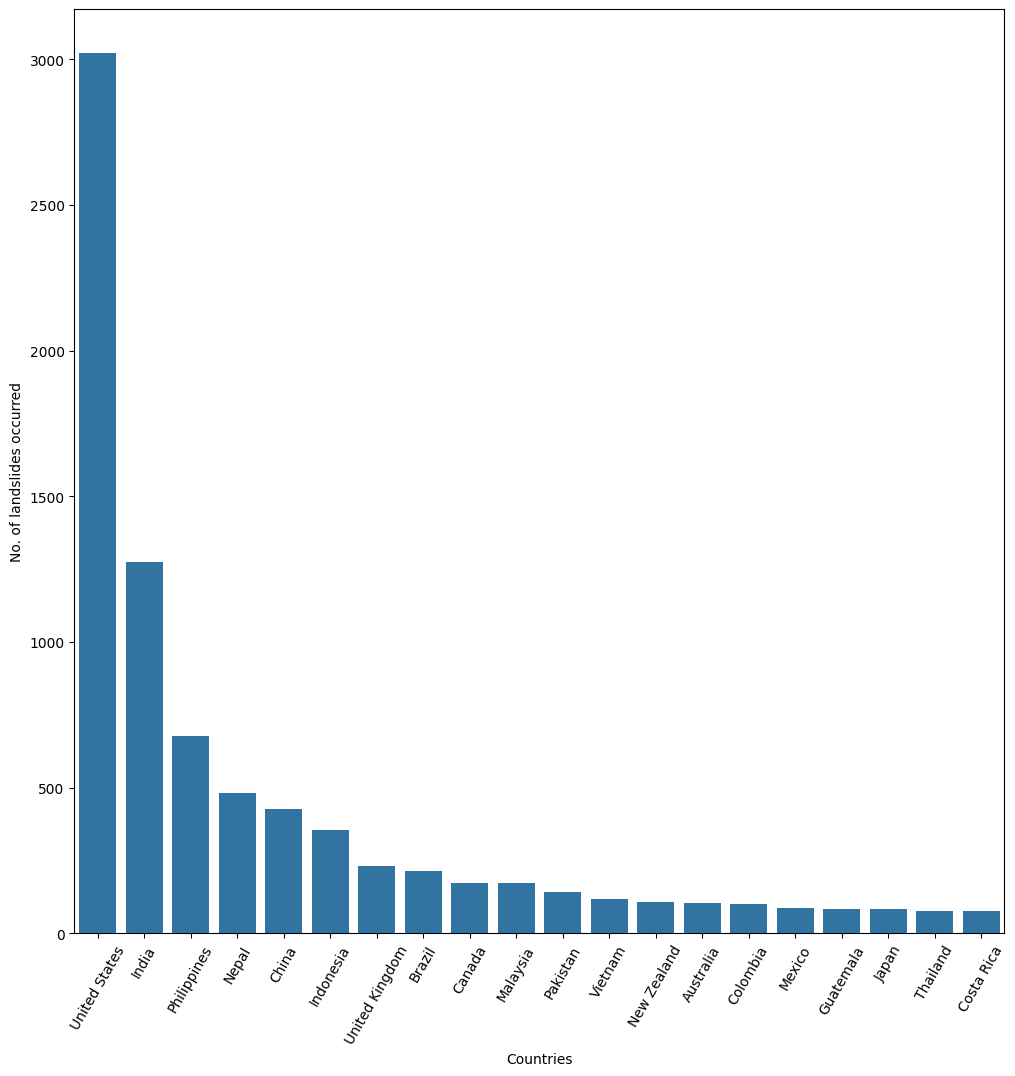

In [19]:
plt.figure(figsize=(12,12))
sns.barplot(x = dict.keys(),y = dict.values())
plt.xticks(rotation = 60)
plt.xlabel("Countries")
plt.ylabel("No. of landslides occurred")
plt.show()

### This is the plot of top 20 countries with the count of landslides

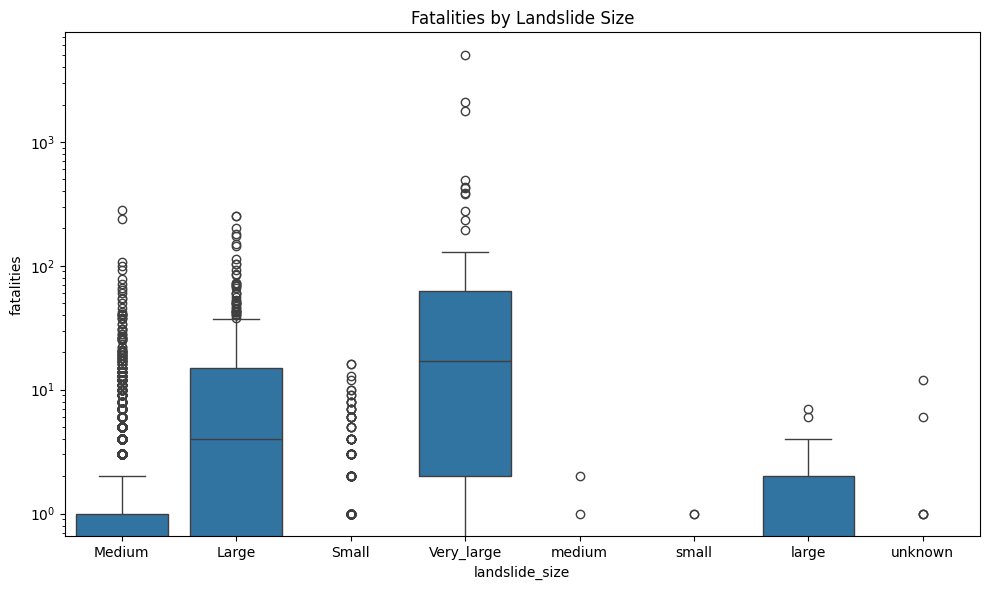

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='landslide_size', y='fatalities', data=df)
plt.title('Fatalities by Landslide Size')
plt.yscale('log')
plt.tight_layout()
plt.show()

### This is the boxplot of landslide_size v/s fatalities as seen above there are many outliers

In [21]:
def outlier_removal(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    df_filtered = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    sns.histplot(df_filtered[col],kde = True)

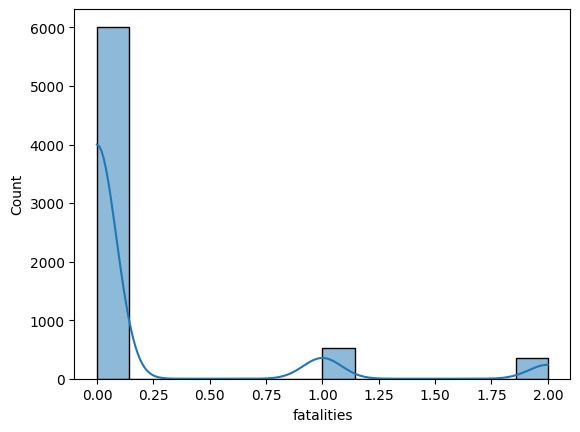

In [22]:
outlier_removal('fatalities')

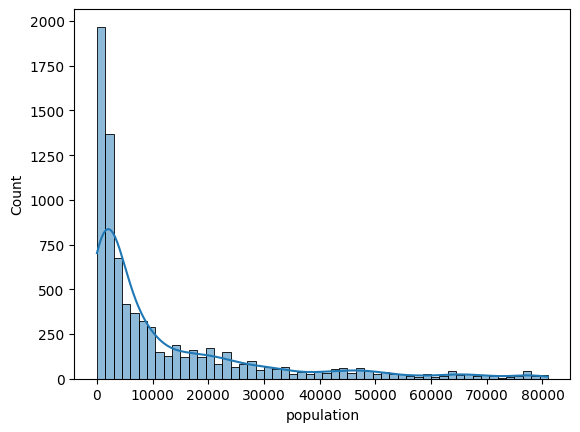

In [23]:
outlier_removal('population')

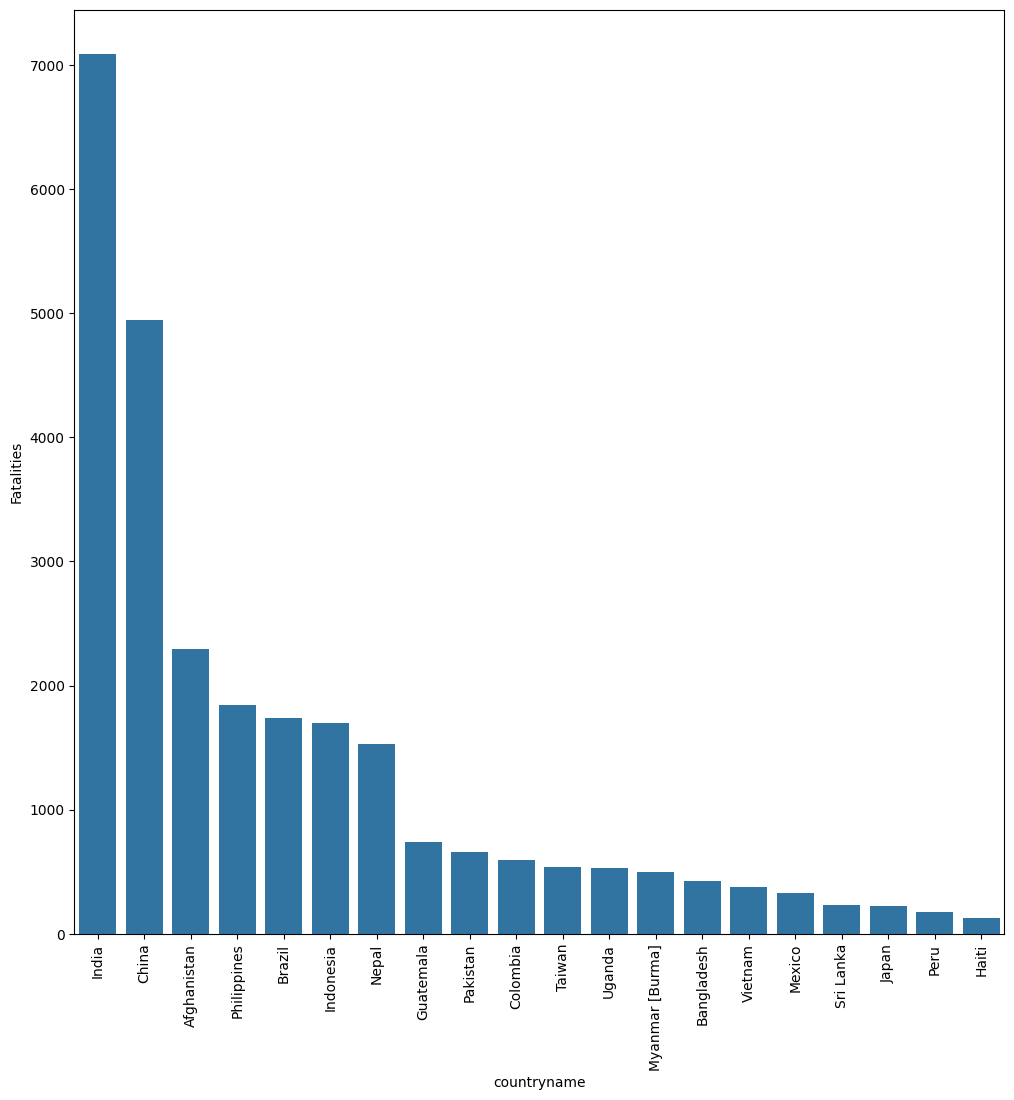

In [24]:
country_fatalities =  df.groupby(df['countryname'])['fatalities'].sum().sort_values(ascending = False).head(20)
country_fatalities
plt.figure(figsize=(12,12))
sns.barplot(x = country_fatalities.index, y = country_fatalities.values)
plt.ylabel("Fatalities")
plt.xticks(rotation = 90)
plt.show()

### This is the bar plot showing Top 20 countries with most fatalities

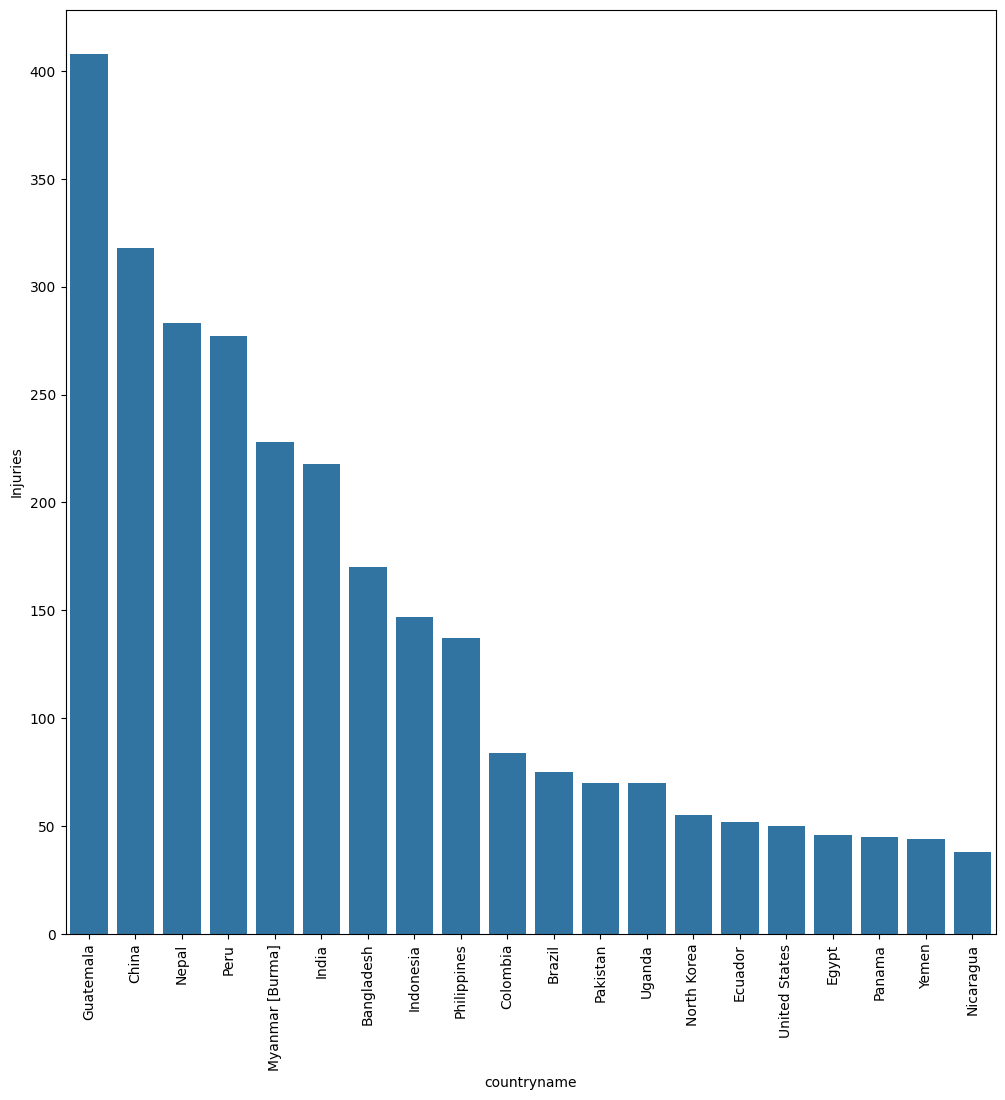

In [25]:
country_injuries =  df.groupby(df['countryname'])['injuries'].sum().sort_values(ascending = False).head(20)
country_injuries
plt.figure(figsize=(12,12))
sns.barplot(x = country_injuries.index, y = country_injuries.values)
plt.ylabel("Injuries")
plt.xticks(rotation = 90)
plt.show()

### This is the bar plot showing Top 20 countries with most injuries

In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

### converted the date columns from object/categorical form to datetime format

In [27]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

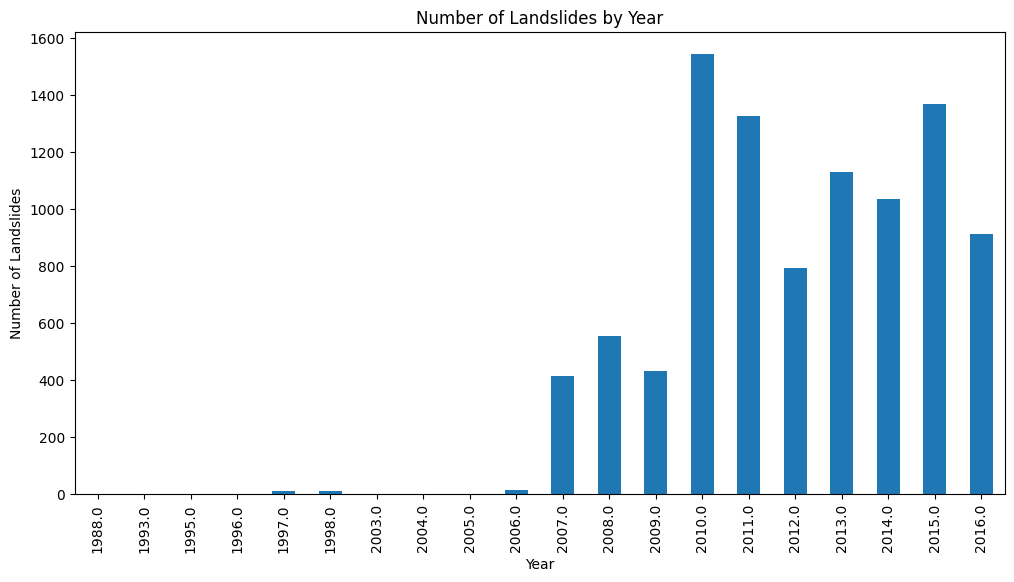

In [28]:
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')
plt.title('Number of Landslides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=90)
plt.show()

### This is the bar plot showing Yearly stats of landslides

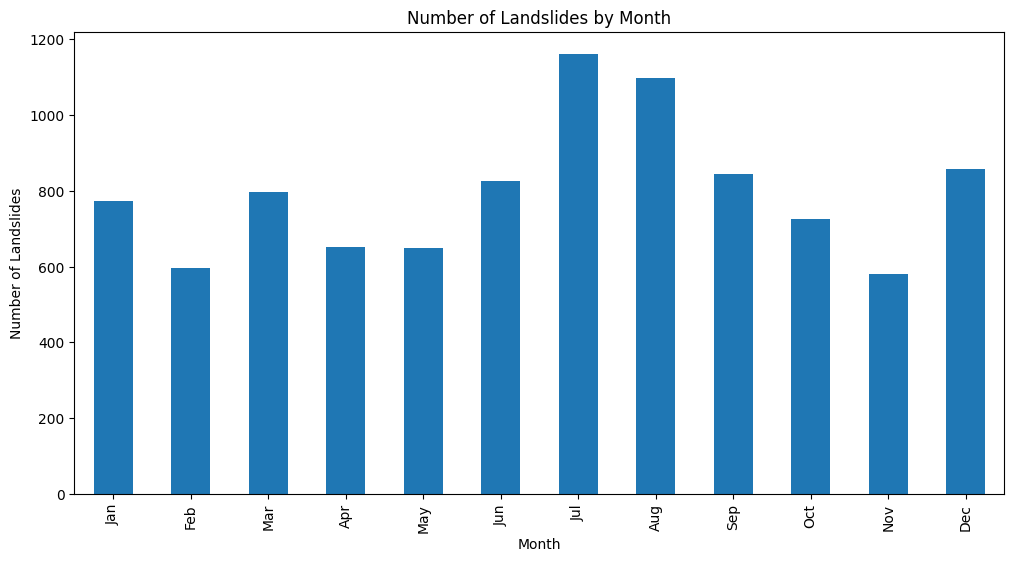

In [29]:
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Number of Landslides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Landslides')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### This is the bar plot showing Monthly stats of landslides

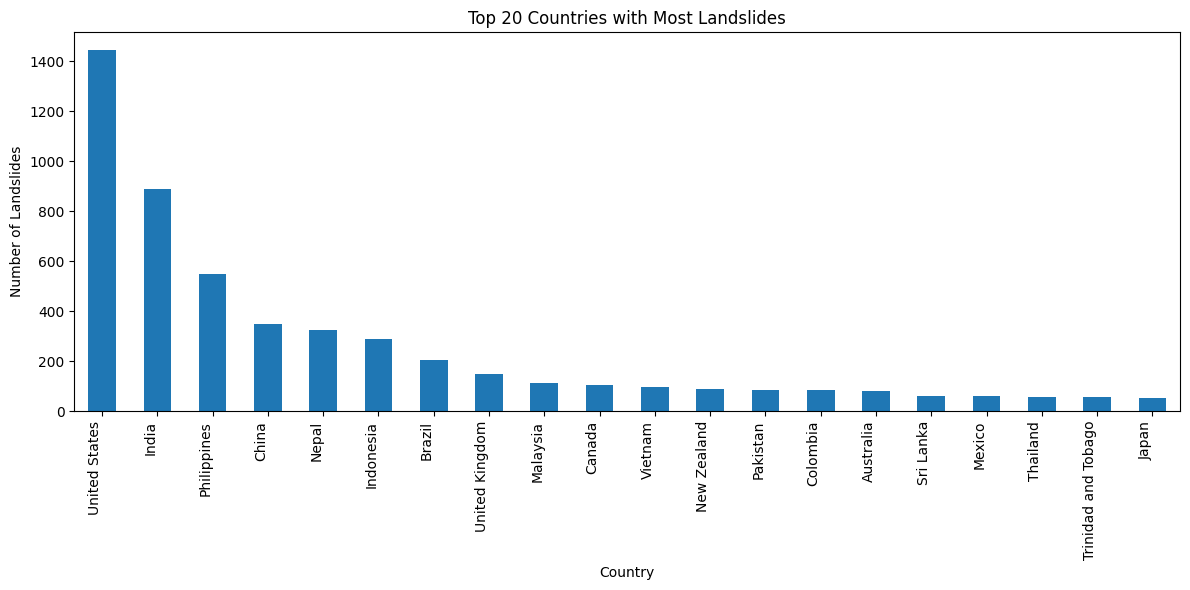

In [30]:
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries with Most Landslides')
plt.xlabel('Country')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### This is the bar plot showing Top 20 countries with most no. of landslides

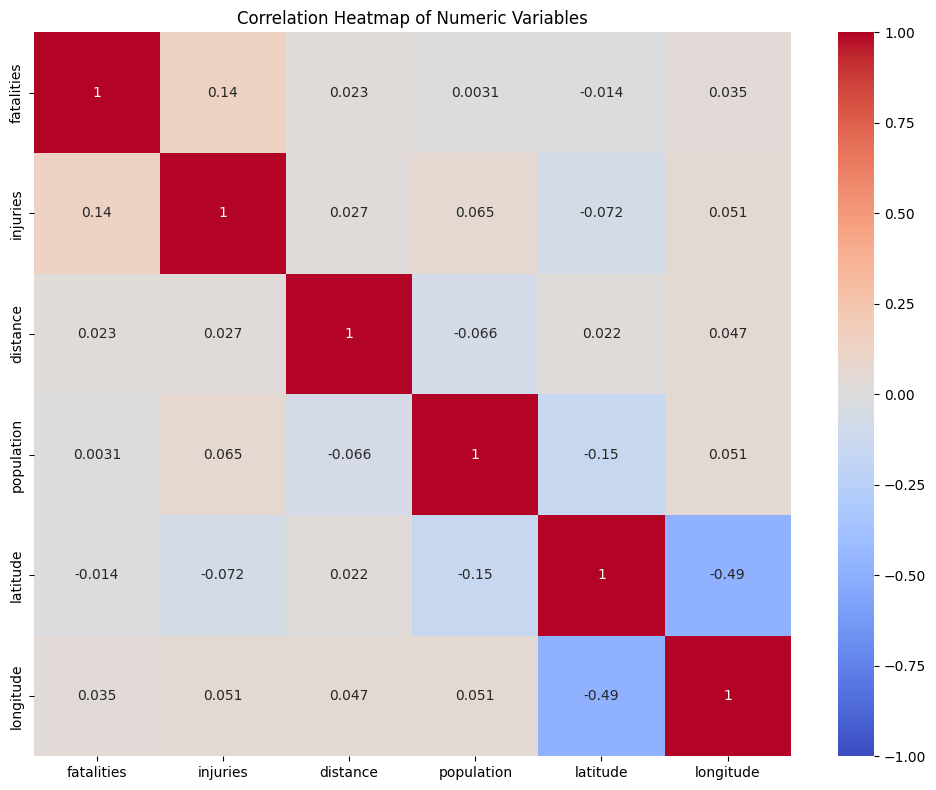

In [31]:
numeric_cols = ['fatalities', 'injuries', 'distance', 'population', 'latitude', 'longitude']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

### This is the correlation matrix as heatmap which shows correlation between numerical columns

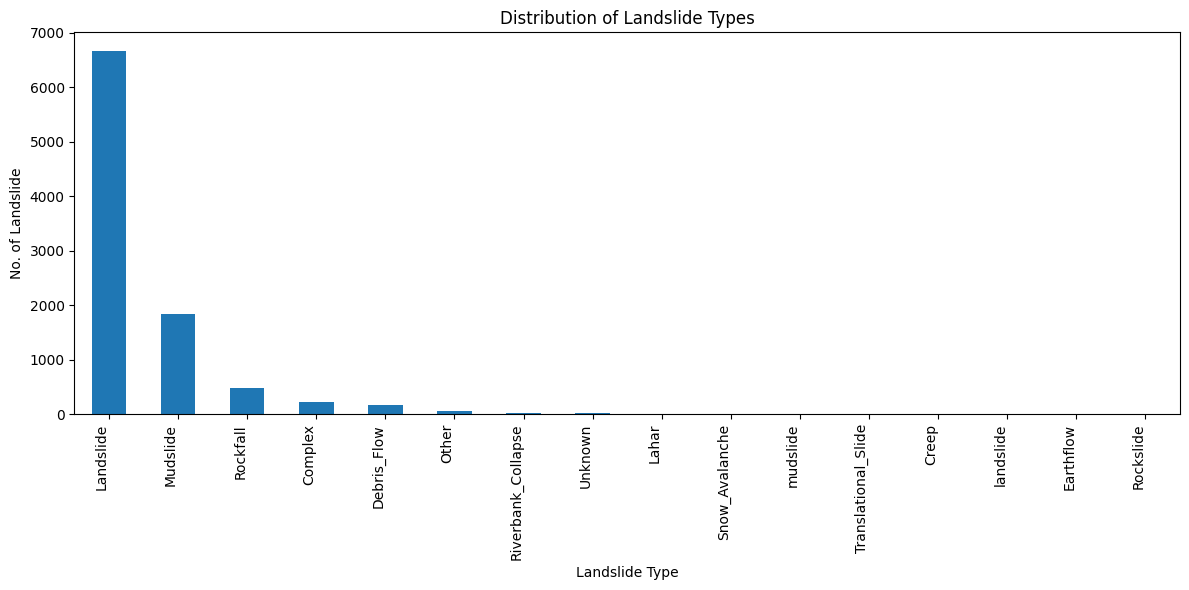

In [32]:
plt.figure(figsize=(12, 6))
df['landslide_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Landslide Types')
plt.xlabel('Landslide Type')
plt.ylabel('No. of Landslide')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### This is the bar plot showing landslide type respective to Landslide count

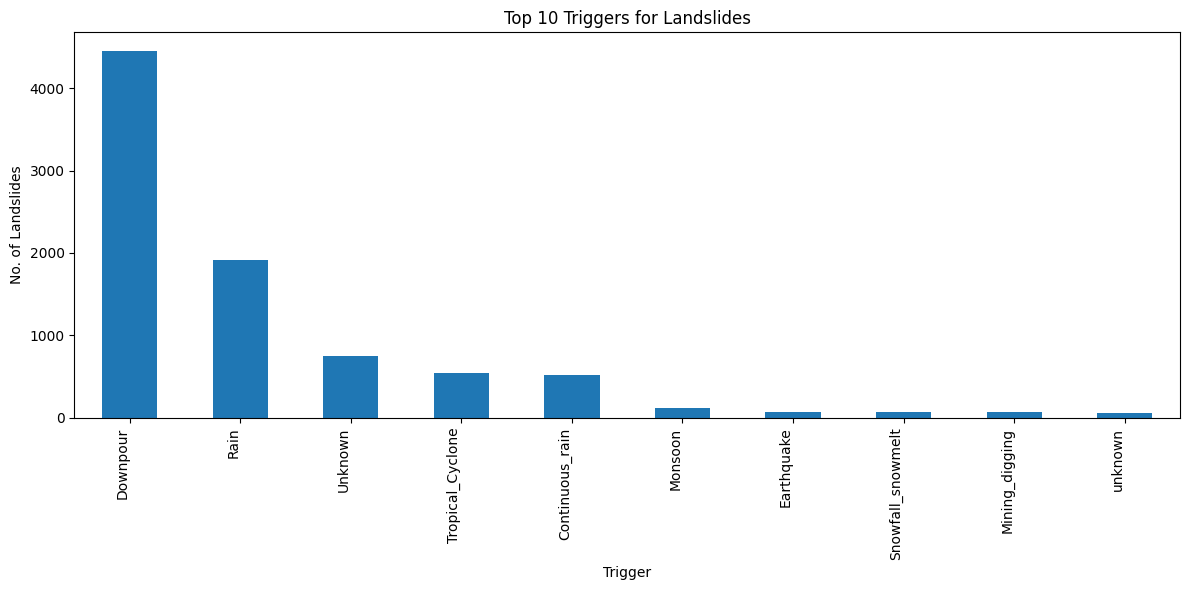

In [33]:
plt.figure(figsize=(12, 6))
df['trigger'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Triggers for Landslides')
plt.xlabel('Trigger')
plt.ylabel('No. of Landslides')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### This is the bar plot showing triggers respective to Landslide count

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from tqdm import tqdm
selected_features = [
    'date', 'country', 'hazard_type', 'landslide_type', 'trigger',
    'fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population'
]

df_selected = df[selected_features].copy()

### Here we have selected the most useful features for further analysis

In [35]:
df_selected['year'] = df_selected['date'].dt.year
df_selected['month'] = df_selected['date'].dt.month
df_selected['day'] = df_selected['date'].dt.day
df_selected['day_of_week'] = df_selected['date'].dt.dayofweek
df_selected['is_weekend'] = df_selected['day_of_week'].isin([5, 6]).astype(int)
df_selected['season'] = df_selected['month'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0})

### Here we have created some temporary features for more accurate analysis

In [36]:
df_selected['total_casualties'] = df_selected['fatalities'] + df_selected['injuries']

### Here the total casualities column is filled with the sum of values of fatalities and injuries

In [37]:
df_selected['total_casualties'].value_counts().sort_values(ascending=False)

total_casualties
0.0      3050
1.0       177
2.0       123
3.0       110
4.0        80
         ... 
71.0        1
77.0        1
204.0       1
32.0        1
84.0        1
Name: count, Length: 76, dtype: int64

In [38]:
df_selected['affected_area'] = np.pi * df_selected['distance']**2
df_selected['population_density'] = df_selected['population'] / df_selected['affected_area']

### Created 2 more features affected area is the circular area till which the landslide affected and the population dencity is the population per affected area

In [39]:
le = LabelEncoder()
categorical_columns = ['country', 'hazard_type', 'landslide_type', 'trigger']
for col in tqdm(categorical_columns, desc="Encoding categorical variables"):
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

Encoding categorical variables: 100%|██████████| 4/4 [00:00<00:00, 240.54it/s]


### Here we encoded the categorical columns using Label Encoder

In [40]:
numeric_columns = ['fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population', 'total_casualties', 'population_density']
imputer = SimpleImputer(strategy='median')
df_selected[numeric_columns] = imputer.fit_transform(df_selected[numeric_columns])

### Here the numerical columns are imputed using Simple Imputer

In [41]:
df_selected = df_selected.drop('date', axis=1)

In [42]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             9564 non-null   int32  
 1   hazard_type         9564 non-null   int32  
 2   landslide_type      9564 non-null   int32  
 3   trigger             9564 non-null   int32  
 4   fatalities          9564 non-null   float64
 5   injuries            9564 non-null   float64
 6   latitude            9564 non-null   float64
 7   longitude           9564 non-null   float64
 8   distance            9564 non-null   float64
 9   population          9564 non-null   float64
 10  year                9563 non-null   float64
 11  month               9563 non-null   float64
 12  day                 9563 non-null   float64
 13  day_of_week         9563 non-null   float64
 14  is_weekend          9564 non-null   int32  
 15  season              9563 non-null   float64
 16  total_

In [43]:
df_selected.head()

,country,hazard_type,landslide_type,trigger,fatalities,injuries,latitude,longitude,distance,population,year,month,day,day_of_week,is_weekend,season,total_casualties,affected_area,population_density
0,132,1,5,13,1.0,0.0,54.549400,-3.587500,0.22405,24803.0,2007.0,1.0,2.0,1.0,0,0.0,0.0,0.157703,157276.720251
1,88,1,0,13,0.0,0.0,-10.383800,-75.426700,12.26171,0.0,2007.0,1.0,3.0,2.0,0,0.0,0.0,472.336986,0.000000
2,17,1,5,13,7.0,0.0,-22.282346,-42.536362,0.63016,153361.0,2007.0,1.0,5.0,4.0,0,0.0,0.0,1.247532,122931.560356
3,17,1,5,13,2.0,0.0,-22.045200,-42.673400,14.05144,11555.0,2007.0,1.0,5.0,4.0,0,0.0,0.0,620.285372,18.628522
4,17,1,5,13,1.0,0.0,-23.231100,-46.613600,10.07582,54415.0,2007.0,1.0,5.0,4.0,0,0.0,0.0,318.941236,170.611366


In [44]:
df_selected.describe()

,country,hazard_type,landslide_type,trigger,fatalities,injuries,latitude,longitude,distance,population,year,month,day,day_of_week,is_weekend,season,total_casualties,affected_area,population_density
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9563.000000,9563.000000,9563.000000,9563.00000,9564.000000,9563.000000,9564.000000,9.530000e+03,9.564000e+03
mean,101.659975,1.003137,5.294333,8.750105,3.037118,0.351317,25.661806,3.815776,11.882477,1.563432e+05,2012.043606,6.654397,15.574506,2.95493,0.284086,1.539475,1.276558,1.211311e+03,5.034787e+08
std,43.695215,0.072240,1.505487,5.761192,59.936868,5.332445,20.416185,100.238678,15.594015,8.258188e+05,2.706148,3.319820,8.569887,2.04298,0.451002,1.078970,24.145359,4.680767e+03,3.767368e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.774800,-170.799800,0.000030,0.000000e+00,1988.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,2.827433e-09,0.000000e+00
25%,54.000000,1.000000,5.000000,4.000000,0.000000,0.000000,13.579075,-104.920000,2.377782,1.963000e+03,2010.000000,4.000000,8.000000,1.00000,0.000000,1.000000,0.000000,1.761249e+01,3.445330e+00
50%,133.000000,1.000000,5.000000,4.000000,0.000000,0.000000,29.855400,23.184050,6.264345,7.317000e+03,2012.000000,7.000000,16.000000,3.00000,0.000000,2.000000,0.000000,1.232825e+02,5.204076e+01
75%,140.000000,1.000000,6.000000,13.000000,0.000000,0.000000,41.134575,94.359700,15.788362,3.374800e+04,2014.000000,9.000000,23.000000,5.00000,1.000000,2.000000,0.000000,7.878812e+02,1.102830e+03
max,140.000000,3.000000,16.000000,20.000000,5000.000000,374.000000,72.627500,179.422100,215.448880,1.269184e+07,2016.000000,12.000000,31.000000,6.00000,1.000000,3.000000,2100.000000,1.458271e+05,3.499994e+12


### This is Univariate Analysis

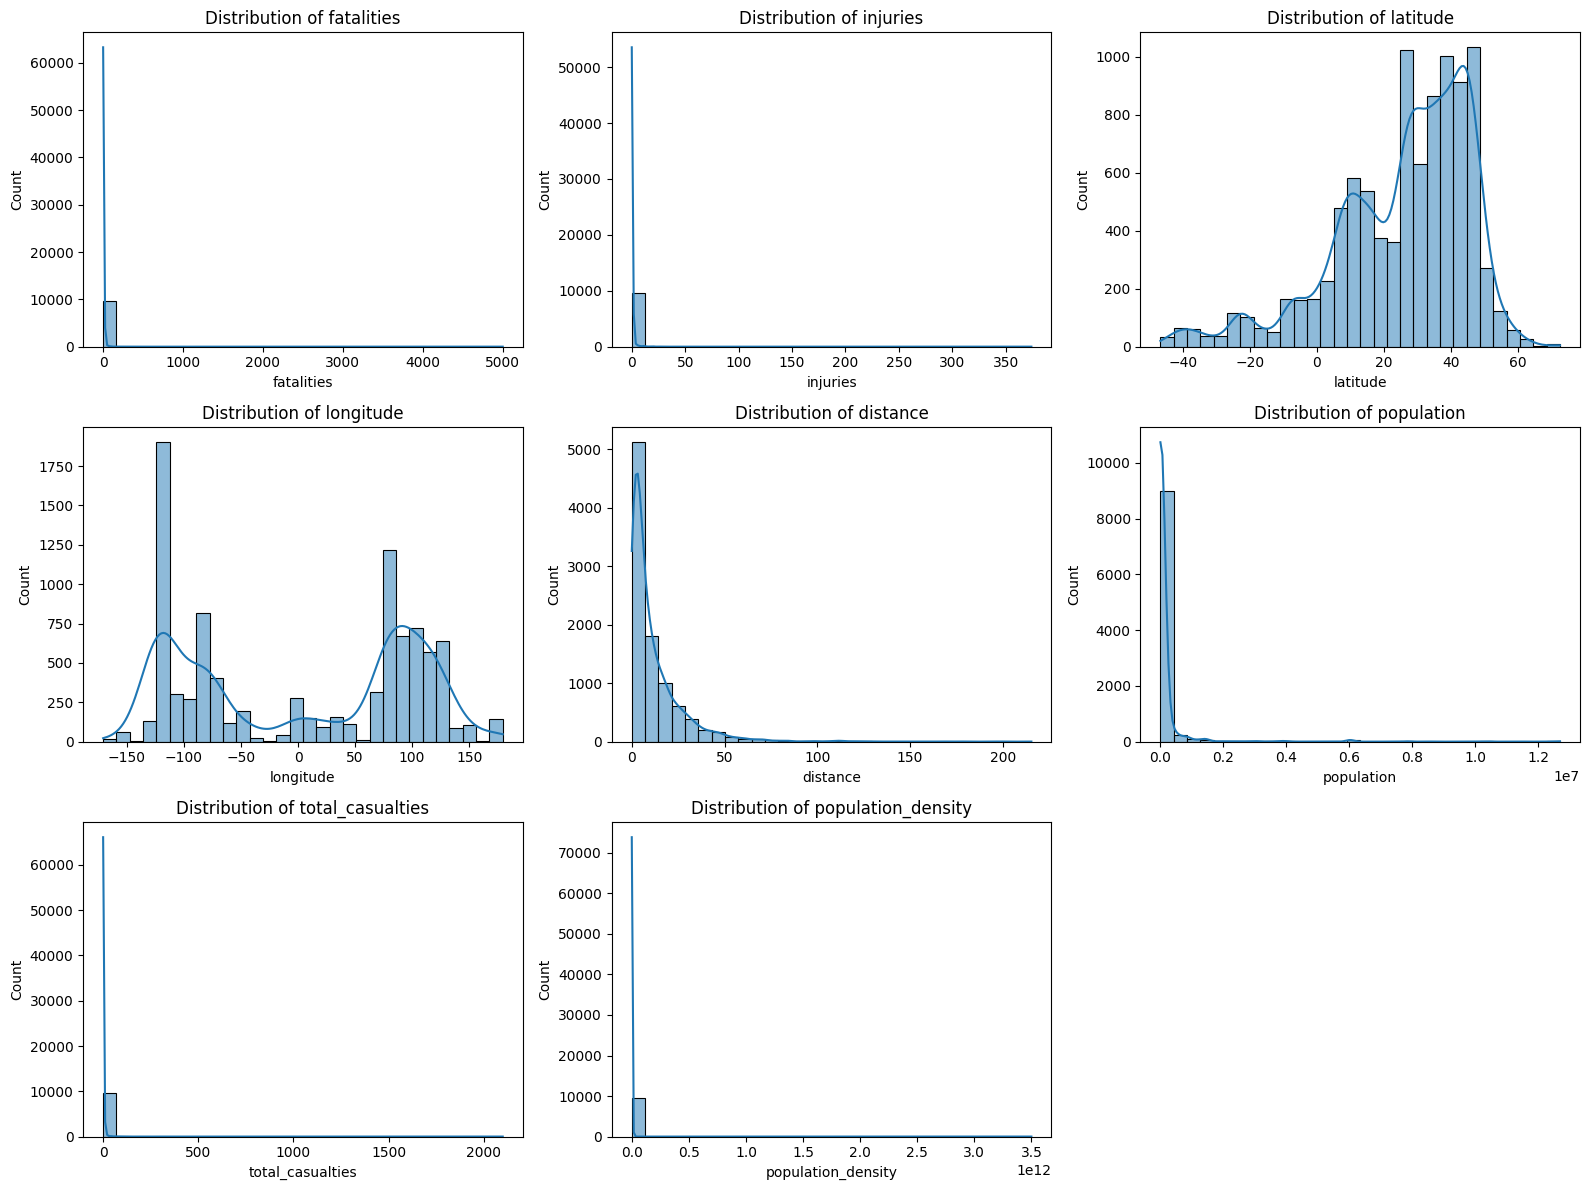

In [45]:
plt.figure(figsize=(16, 12))
numeric_features = ['fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population', 'total_casualties', 'population_density']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_selected[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### This is Bivariate Analysis

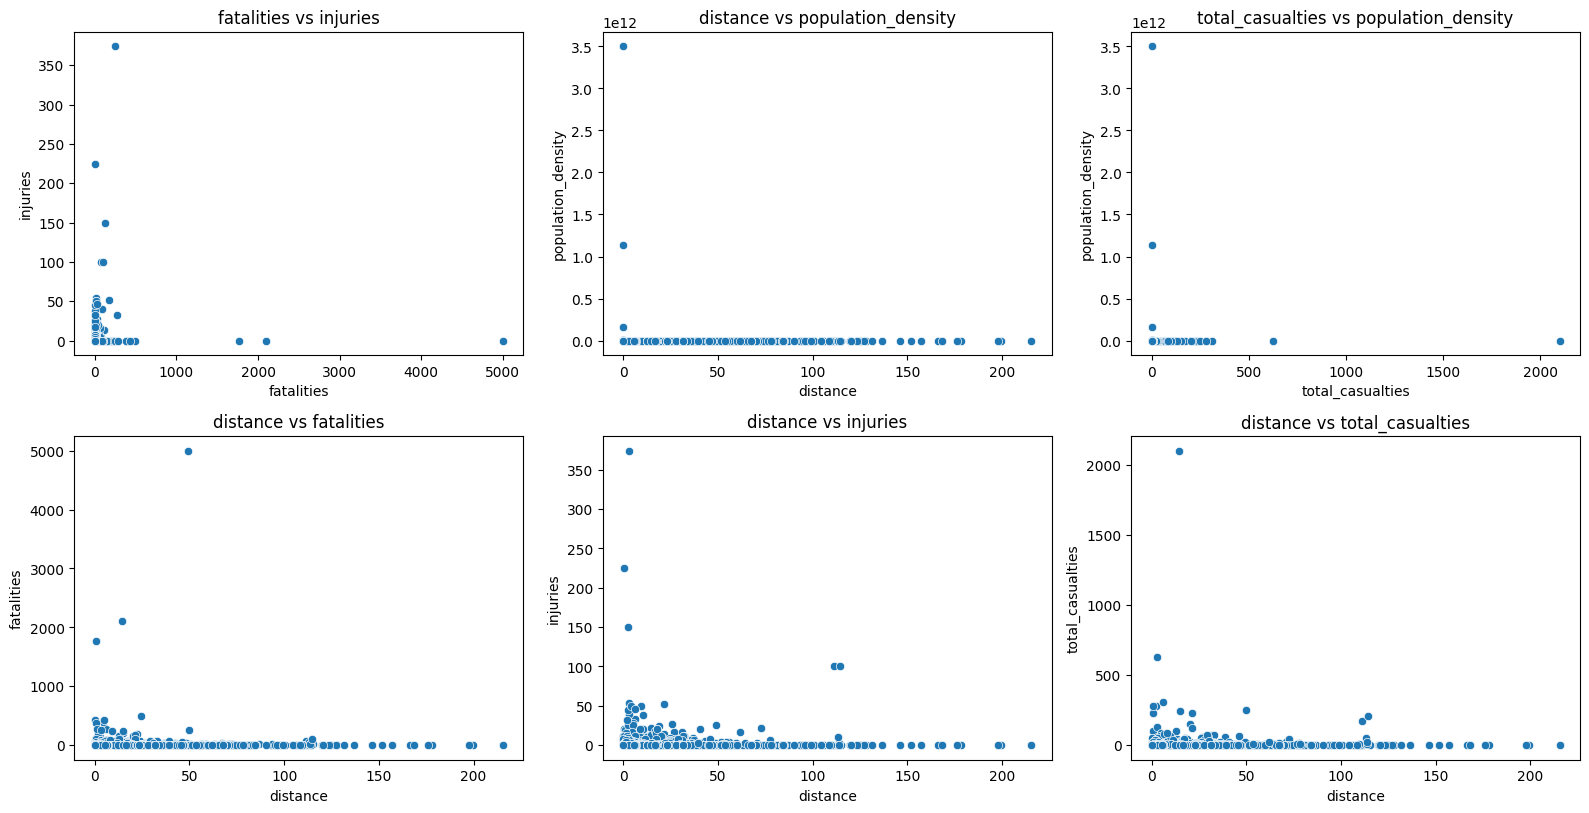

In [46]:
plt.figure(figsize=(16, 12))
pairs = [('fatalities', 'injuries'), ('distance', 'population_density'),('total_casualties','population_density'),('distance','fatalities'),('distance','injuries'),('distance','total_casualties')]
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_selected, x=x, y=y)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

In [50]:
import plotly.express as px
fig = px.scatter_geo(df_selected, lat='latitude', lon='longitude')
fig.update_layout(title='Plotted locations on map', title_x=0.5)
fig.show()

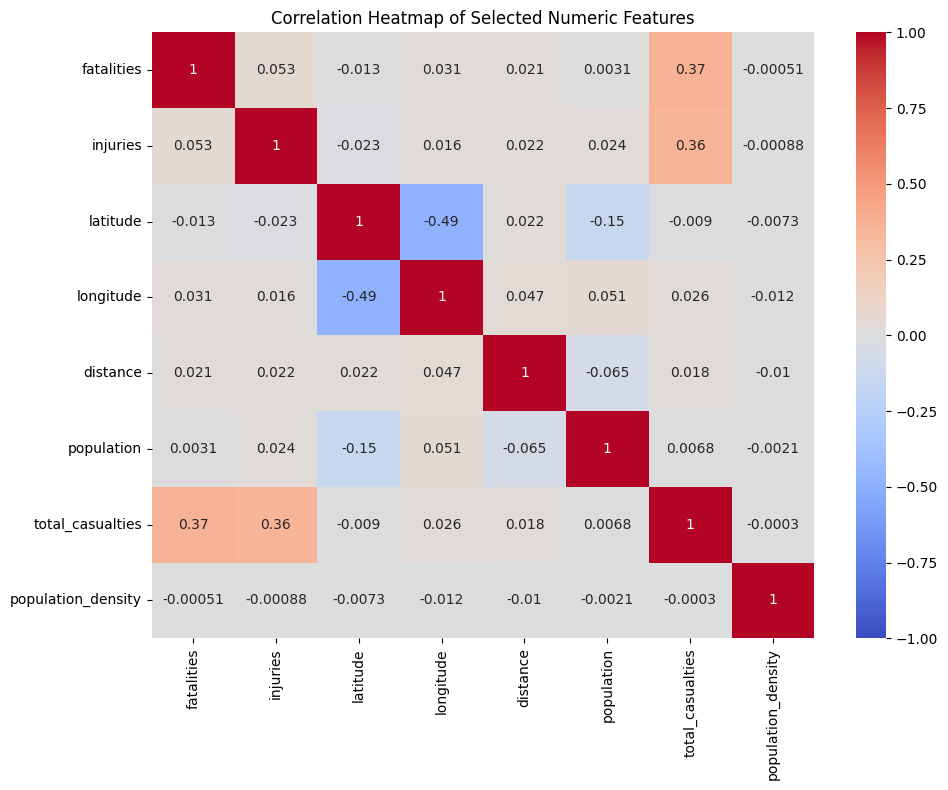

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_selected[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Selected Numeric Features')
plt.tight_layout()
plt.show()

### Saving final dataframe to csv file

In [ ]:
df_selected.to_csv("Cleaned_data.csv")